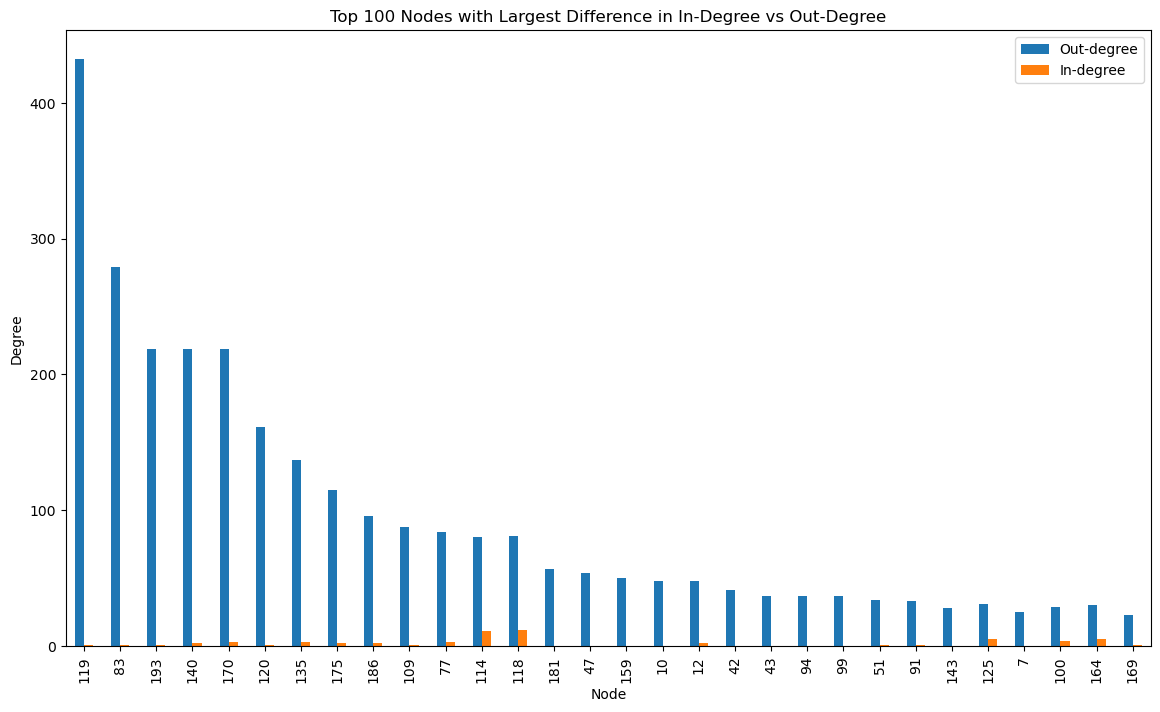

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('DREAM5_Network_GRN_3types_ids.csv', usecols=[0, 1], header=None, names=['source', 'target'])

# 计算出度（节点作为source出现的次数）
out_degree = data['source'].value_counts()

# 计算入度（节点作为target出现的次数）
in_degree = data['target'].value_counts()

# 合并出度和入度为一个DataFrame
degree_df = pd.DataFrame({'Out-degree': out_degree, 'In-degree': in_degree}).fillna(0)

# 计算出度和入度的差值
degree_df['Difference'] = abs(degree_df['Out-degree'] - degree_df['In-degree'])

# 选择出度和入度差异最大的前100个节点
top_100_diff = degree_df.nlargest(30, 'Difference')

# 绘制出度和入度的柱状图
top_100_diff[['Out-degree', 'In-degree']].plot(kind='bar', figsize=(14, 8))
plt.title('Top 100 Nodes with Largest Difference in In-Degree vs Out-Degree')
plt.xlabel('Node')
plt.ylabel('Degree')
plt.xticks(rotation=90)
plt.show()